# Sentiment analysis for Movie Reviews


# 1. Summary

I will apply different sentiment analysis models on movie reviews gathered from the Internet Movie Database (IMDb) and find the best model with optimal parameters. Sentiment analysis is a natural language processing (NLP) technique for analysing a text string to determine the sentiment contained within it. For example, you can use sentiment analysis to predict whether a movie review has positive feedback ("I liked this movie") or negative feedback ("The film was a disappointment").

The learning goals of this project are:
- Understand and implement different supervised and unsupervised methods for sentiment analysis.
- Understand important steps of data preparation for deep learning NLP.
- Understand NLP evaluation methods

# 2. Dataset description

The IMDB large movie review dataset is a common dataset for NLP tasks. The dataset consists of 50,000 reviews -- 25,000 for training and 25,000 for testing. The training and test files are evenly divided into 12,500 positive reviews and 12,500 negative reviews, labeled by sentiment (positive/negative). In this assignment, you will be provided an ***input*** folder including a training data file and a testing data file in the *csv* format.

# 3. How to load the data and make output prediciton
The provided *input* folder including only 2 files:

    1. train.csv (25,000 reviews for training including text and sentiment label)
    2. test.csv (25,000 reviews for prediction)

## 3.1 How to load the data

You can load the *"csv"* data files into dataframes using Pandas library. All the data files are located at the ./input/ folder.

List all files available in the *input* folder.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import os
import warnings
warnings.filterwarnings('ignore')

print(os.listdir("/content/"))
pd.set_option('display.max_columns', 10)

['.config', 'test.csv', 'train.csv', 'sample_data']


Load training data

In [ ]:
# train.csv including text and sentiment label using for training model.
data_train_df = pd.read_csv('/content/train.csv')
data_train_df.shape

(25000, 2)

The training data would be a dataframe with 25,000 samples including review text and its sentiment label.

Let print the first 10 training samples.

In [ ]:
data_train_df.head()

,text,sentiment
0,"Now, I won't deny that when I purchased this o...",neg
1,"The saddest thing about this ""tribute"" is that...",neg
2,Last night I decided to watch the prequel or s...,neg
3,I have to admit that i liked the first half of...,neg
4,I was not impressed about this film especially...,neg


The "review" column contains the textual information (input features) and the "sentiment" column contains the output labels. The task of any models is to correctly predict the "sentiment" given any "review" or textual column.

Summary of the training dataset

In [ ]:
data_train_df.describe()

,text,sentiment
count,25000,25000
unique,24904,2
top,How has this piece of crap stayed on TV this l...,neg
freq,3,12500


Sentiment count

In [ ]:
data_train_df['sentiment'].value_counts()

neg    12500
pos    12500
Name: sentiment, dtype: int64

## 3.2 Load test data

You are required to load the test data by yourself.

In [ ]:
####################################
#       TODO: Load test data       #
####################################

data_test_df = pd.read_csv('/content/test.csv')
data_test_df.shape

(25000, 2)

In [ ]:
data_test_df.head()

,text,sentiment
0,"My daughter liked it but I was aghast, that a ...",neg
1,I... No words. No words can describe this. I w...,neg
2,this film is basically a poor take on the old ...,neg
3,"This is a terrible movie, and I'm not even sur...",neg
4,First of all this movie is a piece of reality ...,pos


In [ ]:
data_test_df['sentiment'].value_counts()

neg    12500
pos    12500
Name: sentiment, dtype: int64

# 4. Project Details
The task is to determine / build a classifier for the given data set to classify images into categories and write a report.

Import and install all the necessaries libraries

In [ ]:
!pip install tensorflow==2.7.0
!pip install scikeras
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.7/489.7 MB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 32.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 463.1/463.1 kB 29.0 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.12.0
    Uninstalling tensorflow-estimator-2.12.0:
      Successfully uninstalled tensorflow-estimator-2.12.0
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 23.3.3
    Uninstalling flatbuffers-23.3.3:
      Successfully uninstalled flatbuffers-23.3.3
  Attempting uninstall: tensorflow
    Foun

In [ ]:
########################################
#       TODO: Import libraries         #
########################################

import nltk
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from bs4 import BeautifulSoup
import re,string,unicodedata
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

import keras
import transformers
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Model
from keras.models import Sequential
from keras.layers import LSTM,Dense,Bidirectional,Input
from keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense, Dropout, LSTM
from scikeras.wrappers import KerasClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, precision_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### 4.1.1 Data Preprocessing

The purpose of data preprocessing is to eliminate the redundancies (e.g., punctuations, stopwords, etc.) and to bring text components in the dataset to some standard numerical format. This is one of the key steps before going into the process of building sentiment analysis models. You are required to apply preprocessing techique before you can apply the classification algorithms.

*Hint*: Preprocessing techiques for text data can be used such as *Data cleaning*, *Tokenization*, *Lemmatization*, *Normalization*, *PCA*, etc.

In [ ]:
####################################################
#      TODO: Implement Preprocessing Techniques   #
####################################################
# Data Cleaning
# Define a function to clean the text data
def clean_text(text):
    # Remove non-alphabetic characters and 'br' tags
    text = re.sub('[^A-Za-z0-9]+|br', ' ', text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize the text
    tokens = nltk.word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if not word in stop_words]
    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    # Join the tokens back into a single string
    text = ' '.join(tokens)
    return text

# Apply the clean_text function to the training and testing data
data_train_df['text'] = data_train_df['text'].apply(clean_text)
data_train_df.sentiment.replace("pos" , 1 , inplace = True)
data_train_df.sentiment.replace("neg" , 0 , inplace = True)

data_test_df['text'] = data_test_df['text'].apply(clean_text)
data_test_df.sentiment.replace("pos" , 1 , inplace = True)
data_test_df.sentiment.replace("neg" , 0 , inplace = True)



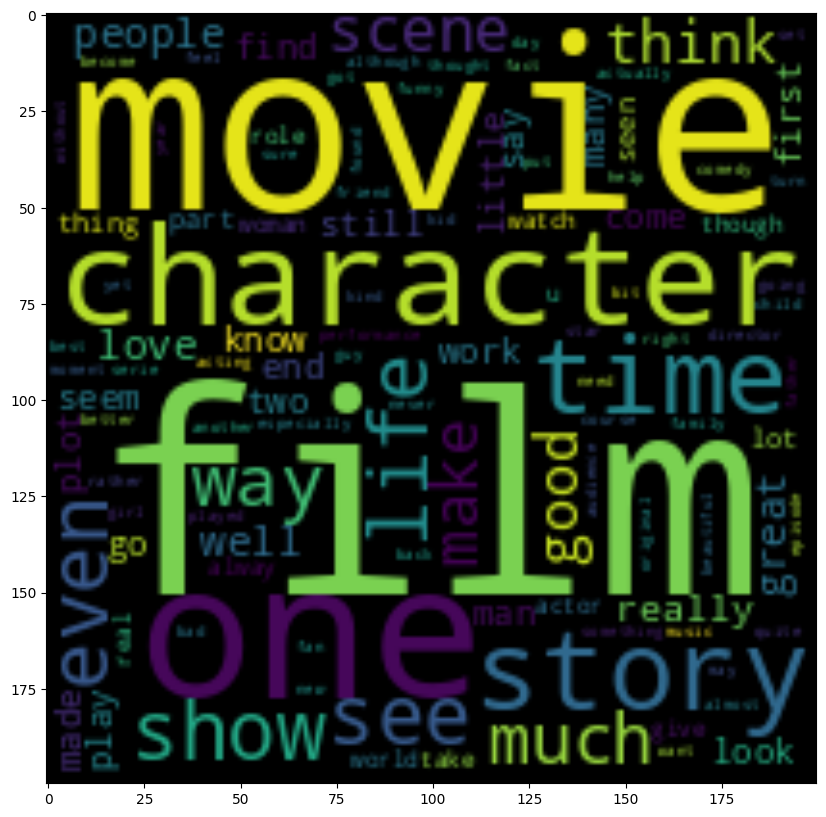

In [ ]:

# Positive Review Text
plt.figure(figsize = (10,10))
wc = WordCloud(max_words = 2000 , width = 200 , height = 200).generate(" ".join(data_train_df[data_train_df.sentiment == 1].text))
plt.imshow(wc , interpolation = 'bilinear')


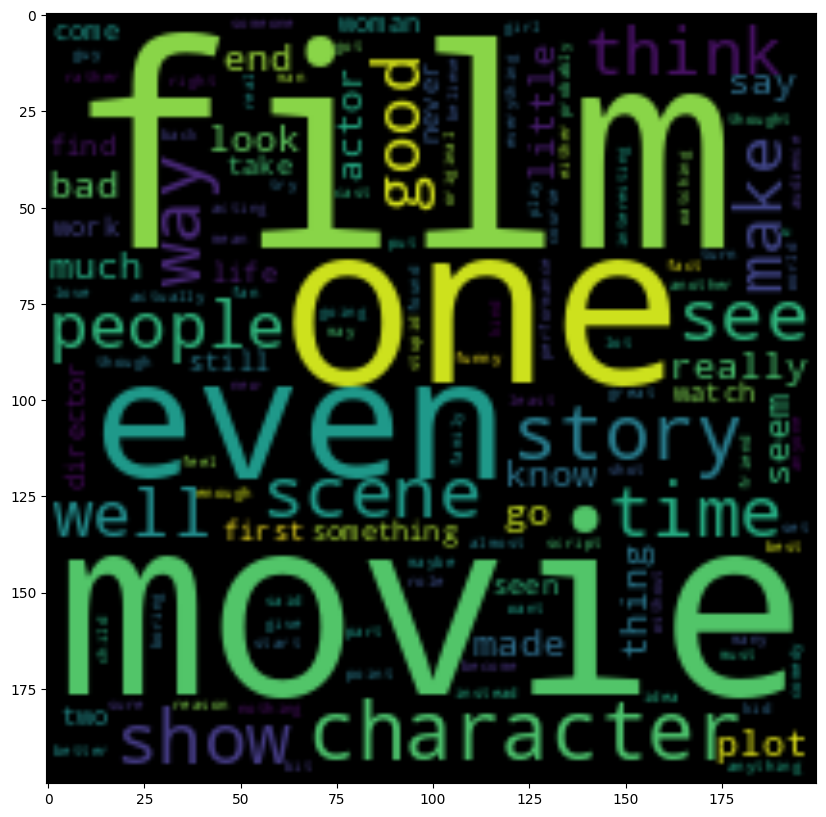

In [ ]:
# Negative Review Text
plt.figure(figsize = (10,10))
wc = WordCloud(max_words = 2000 , width = 200 , height = 200).generate(" ".join(data_train_df[data_train_df.sentiment == 0].text))
plt.imshow(wc , interpolation = 'bilinear')


In [ ]:
# Tokenize the text data
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(data_train_df['text'])
X_train = tokenizer.texts_to_sequences(data_train_df['text'])
X_test = tokenizer.texts_to_sequences(data_test_df['text'])
max_len = 100
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

vocab_size = len(tokenizer.word_index) + 1

# Encode the label data
le = LabelEncoder()
y_train = le.fit_transform(data_train_df['sentiment'])
y_test = le.transform(data_test_df['sentiment'])


### 4.1.2 Sentiment Analysis Model

*Hint*: Models can be built using popular ML/DL libraries such as *Sklearn*, *Pytorch*, *Keras*, *Tensorflow*, etc.

#### 4.1.2.1 Model 1

In [ ]:
##################################
#  TODO: Implement model 1 CNN   #
##################################

# Define the CNN model architecture
def create_cnn(num_filters=64,
               kernel_size=3,
               optimizer='adam',
               activation='relu',
               dropout_rate=0.5):
    model = Sequential()
    model.add(Embedding(vocab_size, 50, input_length=max_len))
    model.add(Conv1D(num_filters, kernel_size, activation='relu'))
    model.add(MaxPooling1D())
    model.add(Flatten())
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model


#### 4.1.2.2 Model 2

In [ ]:
##################################
#   TODO: Implement model 2 LSTM #
##################################

# Define the LSTM model architecture
def create_lstm(optimizer='adam', kernel_size=3, activation='relu', recurrent_dropout=0.2):
    model = keras.models.Sequential([
     keras.layers.Embedding(vocab_size, 64),
     keras.layers.LSTM(64, recurrent_dropout=recurrent_dropout),
     keras.layers.Dense(1, activation="sigmoid")
    ])

    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model


#### 4.1.2.3 Model 3

In [ ]:
##############################################
# TODO: Implement model 3 K-Means Clustering #
##############################################

# Find the best value for Kmeans model
silhouette_scores = []
k_values = range(2, 10)
best_score = -1
best_k = -1
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train)
    labels = kmeans.labels_
    score = silhouette_score(X_train, labels)
    silhouette_scores.append(score)
    if score > best_score:
        best_score = score
        best_k = k


### 4.1.3 Parameter Fine-Tuning

Find the best set of parameters for each method.

*Hint*: You can use fine-tuning methods like *Cross-Validation*, *“Elbow” Method*, *"Silhouette" Method*, etc.

In [ ]:
# Method 1 - CNN
cnn_model = KerasClassifier(model = create_cnn,
                            num_filters = 32,
                            kernel_size = 3,
                            dropout_rate = 0.2,
                            activation='relu',
                            )

cnn_param_dist = {'num_filters': [32, 64],
              'kernel_size': [3, 5, 7],
              'dropout_rate': [0.2, 0.5],
              'optimizer': ['adam', 'rmsprop'],
              'activation': ['relu', 'sigmoid', 'tanh']
}

cnn_random_search = RandomizedSearchCV(estimator=cnn_model,
                              param_distributions=cnn_param_dist,
                              cv=3, verbose=2, n_iter=3)

cnn_results = cnn_random_search.fit(X_train, y_train, batch_size=128, epochs=3)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
Epoch 1/3
131/131 [==============================] - 12s 90ms/step - loss: 0.5855 - accuracy: 0.6646
Epoch 2/3
131/131 [==============================] - 11s 83ms/step - loss: 0.2743 - accuracy: 0.8882
Epoch 3/3
261/261 [==============================] - 1s 4ms/step
[CV] END activation=sigmoid, dropout_rate=0.5, kernel_size=5, num_filters=64, optimizer=rmsprop; total time=  37.2s
Epoch 1/3
131/131 [==============================] - 14s 95ms/step - loss: 0.5926 - accuracy: 0.6551
Epoch 2/3
131/131 [==============================] - 11s 86ms/step - loss: 0.2764 - accuracy: 0.8874
Epoch 3/3
261/261 [==============================] - 1s 4ms/step
[CV] END activation=sigmoid, dropout_rate=0.5, kernel_size=5, num_filters=64, optimizer=rmsprop; total time=  38.0s
Epoch 1/3
131/131 [==============================] - 13s 96ms/step - loss: 0.5905 - accuracy: 0.6730
Epoch 2/3
131/131 [==============================] - 14s 103ms/step - loss

In [ ]:
# Mothod 2 - LSTM
lstm_model = KerasClassifier(build_fn=create_lstm,
                            kernel_size=3,
                            activation='relu',
                            recurrent_dropout = 0.2
                            )

param_dist_lstm = {'kernel_size': [3, 5],
              'optimizer': ['adam', 'rmsprop'],
              'activation': ['relu', 'sigmoid'],
              'recurrent_dropout': [0.2, 0.3, 0.4]
}

lstm_random_search = RandomizedSearchCV(estimator=lstm_model,
                                 param_distributions=param_dist_lstm,
                                 cv=3, verbose=2, n_iter=3)

lstm_result = lstm_random_search.fit(X_train, y_train, batch_size=128, epochs=3)


Fitting 3 folds for each of 3 candidates, totalling 9 fits
Epoch 1/3
131/131 [==============================] - 43s 310ms/step - loss: 0.4547 - accuracy: 0.7743
Epoch 2/3
131/131 [==============================] - 38s 290ms/step - loss: 0.2518 - accuracy: 0.9014
Epoch 3/3
261/261 [==============================] - 8s 29ms/step
[CV] END activation=sigmoid, kernel_size=5, optimizer=rmsprop, recurrent_dropout=0.4; total time= 2.2min
Epoch 1/3
131/131 [==============================] - 39s 286ms/step - loss: 0.4630 - accuracy: 0.7709
Epoch 2/3
131/131 [==============================] - 38s 292ms/step - loss: 0.2673 - accuracy: 0.8955
Epoch 3/3
261/261 [==============================] - 6s 22ms/step
[CV] END activation=sigmoid, kernel_size=5, optimizer=rmsprop, recurrent_dropout=0.4; total time= 2.5min
Epoch 1/3
131/131 [==============================] - 40s 288ms/step - loss: 0.4494 - accuracy: 0.7824
Epoch 2/3
131/131 [==============================] - 41s 309ms/step - loss: 0.2540 - accu

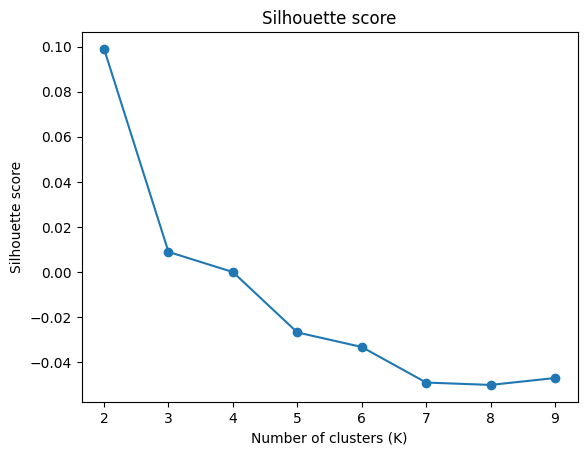

Best K: 2, Silhouette Score: 0.09894401468699303


In [ ]:
# Plot the silhouette scores
plt.plot(k_values, silhouette_scores, '-o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette score')
plt.title('Silhouette score')
plt.show()

print(f"Best K: {best_k}, Silhouette Score: {max(silhouette_scores)}")

### 4.1.4. Evaluation

 Evaluate models' performance by using **at least two different evaluation metrics for each model** and **visualise using graphs or tables.**

*Hint*: Evaluation metrics can be used such as *Accuracy*, *Precision*, *Recall*, etc.  

In [ ]:
# Evaluate the best CNN model on the test set
cnn_best_param = cnn_random_search.best_params_
best_cnn = cnn_random_search.best_estimator_

y_cnn_pred = best_cnn.predict(X_test)
cnn_report = classification_report(y_test, y_cnn_pred)

print(cnn_report)
print(f'CNN Best Parameters: {cnn_best_param}')

782/782 [==============================] - 3s 4ms/step
              precision    recall  f1-score   support

           0       0.88      0.86      0.87     12500
           1       0.87      0.88      0.87     12500

    accuracy                           0.87     25000
   macro avg       0.87      0.87      0.87     25000
weighted avg       0.87      0.87      0.87     25000

CNN Best Parameters: {'optimizer': 'rmsprop', 'num_filters': 64, 'kernel_size': 3, 'dropout_rate': 0.5, 'activation': 'tanh'}


In [ ]:
cnn_cm = confusion_matrix(y_test, y_cnn_pred)

print("CNN Confusion Matrix:")
print(cnn_cm)

CNN Confusion Matrix:
[[10804  1696]
 [ 1524 10976]]


In [ ]:
# Evaluate the best LSTM model on the test set
lstm_best_param = lstm_random_search.best_params_
best_lstm = lstm_random_search.best_estimator_

y_lstm_pred = best_lstm.predict(X_test)
lstm_report = classification_report(y_test, y_lstm_pred)

print(lstm_report)
print(f'LSTM Best Parameters: {lstm_best_param}')

782/782 [==============================] - 20s 25ms/step
              precision    recall  f1-score   support

           0       0.87      0.86      0.86     12500
           1       0.86      0.88      0.87     12500

    accuracy                           0.87     25000
   macro avg       0.87      0.87      0.87     25000
weighted avg       0.87      0.87      0.87     25000

LSTM Best Parameters: {'recurrent_dropout': 0.4, 'optimizer': 'rmsprop', 'kernel_size': 3, 'activation': 'relu'}


In [ ]:
lstm_cm = confusion_matrix(y_test, y_lstm_pred)

print("LSTM Confusion Matrix:")
print(lstm_cm)

LSTM Confusion Matrix:
[[10692  1808]
 [ 1538 10962]]


In [ ]:
# Evaluate the best Kmeans model on the test set
best_kmeans = KMeans(n_clusters=best_k, random_state=42)
best_kmeans.fit(X_train)
y_kmeans_pred = best_kmeans.predict(X_test)

inertia = best_kmeans.inertia_
sil_score = silhouette_score(X_test, y_kmeans_pred)

print(f"Best K: {best_k}")
print(f"Inertia score of best K: {inertia}")
print(f"Silhouette score of best K: {sil_score}")


Best K: 2
Inertia score of best K: 2458448209519.679
Silhouette score of best K: 0.10738757530348989


### 4.1.4 Comparison

After fine-tuning parameters for each model, we would like to make comparisons using graphs or tables between all models using their own best hyper-parameters to select the best model.

In [ ]:
#######################################
#    TODO: Evaluation and Coparsion   #
#######################################
# Method 1 CNN
cnn_acc = accuracy_score(y_test, y_cnn_pred)
print("CNN Accuracy on test set: {:.2f}%".format(cnn_acc*100))

# Method 2 LSTM
lstm_acc = accuracy_score(y_test, y_lstm_pred)
print("LSTM Accuracy on test set: {:.2f}%".format(lstm_acc*100))

# Method 3 Kmeans
print(f"Kmeans Silhouette Score on test set: {sil_score}")

CNN Accuracy on test set: 87.12%
LSTM Accuracy on test set: 86.62%
Kmeans Silhouette Score on test set: 0.10738757530348989


### 4.1.5 Software & Hardware Specification

Provide the specifications of software and hardware (e.g., the version of main packages, the information of CPU/GPU/TPU usage, etc.)  

In [ ]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0xffffffff
cpu MHz		: 2199.998
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa mmio_stale_data retbleed
bogomips	: 4399.99
clflush size	: 64
cache_alignment	: 64
addres

In [ ]:
!python --version
!pip freeze

Python 3.9.16
absl-py==1.4.0
alabaster==0.7.13
albumentations==1.2.1
altair==4.2.2
anyio==3.6.2
appdirs==1.4.4
argon2-cffi==21.3.0
argon2-cffi-bindings==21.2.0
arviz==0.15.1
astropy==5.2.2
astunparse==1.6.3
attrs==22.2.0
audioread==3.0.0
autograd==1.5
Babel==2.12.1
backcall==0.2.0
beautifulsoup4==4.11.2
bleach==6.0.0
blis==0.7.9
blosc2==2.0.0
bokeh==2.4.3
branca==0.6.0
CacheControl==0.12.11
cached-property==1.5.2
cachetools==5.3.0
catalogue==2.0.8
certifi==2022.12.7
cffi==1.15.1
chardet==4.0.0
charset-normalizer==2.0.12
chex==0.1.7
click==8.1.3
cloudpickle==2.2.1
cmake==3.25.2
cmdstanpy==1.1.0
colorcet==3.0.1
colorlover==0.3.0
community==1.0.0b1
confection==0.0.4
cons==0.4.5
contextlib2==0.6.0.post1
contourpy==1.0.7
convertdate==2.4.0
cryptography==40.0.1
cufflinks==0.17.3
cvxopt==1.3.0
cvxpy==1.3.1
cycler==0.11.0
cymem==2.0.7
Cython==0.29.34
dask==2022.12.1
datascience==0.17.6
db-dtypes==1.1.1
dbus-python==1.2.16
debugpy==1.6.6
decorator==4.4.2
defusedxml==0.7.1
distributed==2022.12.1

## 4.2 Report (20 points)

### The report must clearly show:
    1. Detail of student including ID, name
    2. Details of data preprocessing technieques
    3. Details of sentiment analysis methodology
    4. Details of model performance, evaluation & comparison
    5. Conclusion
    6. Clearly provide instructions on how to run your code, hardware and software environments in the Appendix section

**Important Note**: The maximum length of the report is 10 (excluding appendix and references). Please find the report template for your reference.